In [1]:
import pandas as pd

# Define the path to the CSV file
properties_2016 = pd.read_csv('zillow-prize-1/properties_2016.csv', low_memory=False)
train_2016 = pd.read_csv('zillow-prize-1/train_2016_v2.csv', low_memory=False)
# Read the CSV file into a DataFrame
df_train = train_2016.merge(properties_2016, how='left', on='parcelid')

# Display the first few rows of the DataFrame
print("DataFrame head:")
print(df_train.head())

num_rows = df_train.shape[0]
print(f"The DataFrame has {num_rows} rows.")

DataFrame head:
   parcelid  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid  ...  numberofstories  \
0                  NaN                    4.0  ...              NaN   
1                  NaN              

In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
!pip3 install seaborn
import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


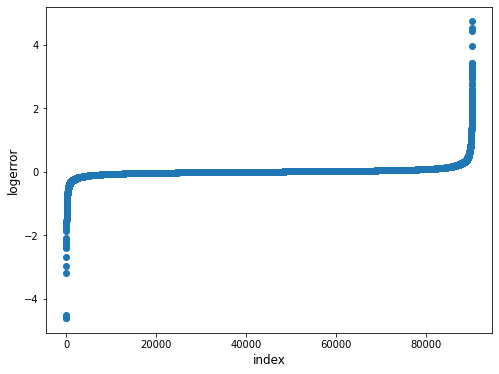

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

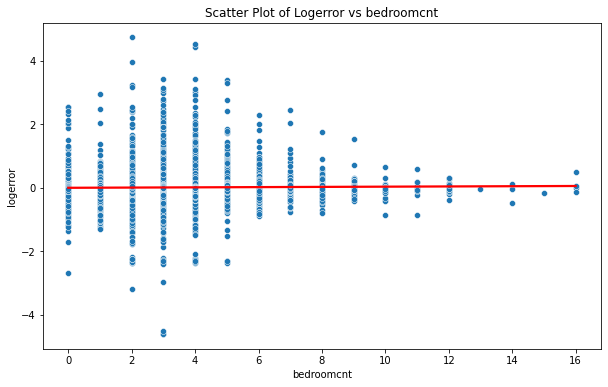

In [4]:
variable_of_interest = 'bedroomcnt'  # Replace with your column name

# Check if the columns exist in the DataFrame
if 'logerror' in df_train.columns and variable_of_interest in df_train.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_train[variable_of_interest], y=df_train['logerror'])

    # Add a regression line
    sns.regplot(x=df_train[variable_of_interest], y=df_train['logerror'], scatter=False, color='red')

    # Set the title and labels
    plt.title('Scatter Plot of Logerror vs ' + variable_of_interest)
    plt.xlabel(variable_of_interest)
    plt.ylabel('logerror')

    # Show the plot
    plt.show()

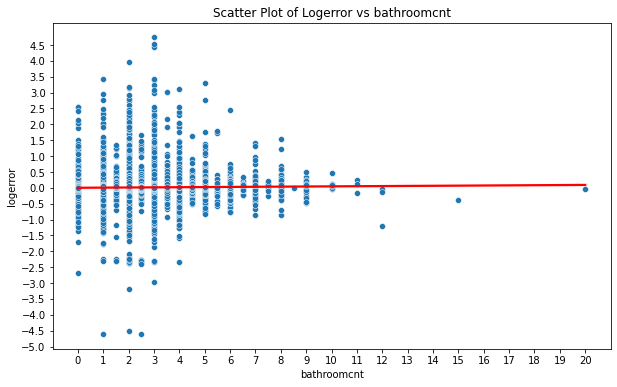

In [5]:
variable_of_interest = 'bathroomcnt'  # Replace with your column name

# Check if the columns exist in the DataFrame
if 'logerror' in df_train.columns and variable_of_interest in df_train.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_train[variable_of_interest], y=df_train['logerror'])

    # Add a regression line
    sns.regplot(x=df_train[variable_of_interest], y=df_train['logerror'], scatter=False, color='red')

    # Set the title and labels
    plt.title('Scatter Plot of Logerror vs ' + variable_of_interest)
    plt.xlabel(variable_of_interest)
    plt.ylabel('logerror')
     # Set x-axis ticks to increment by 1
    x_ticks = range(0, int(df_train[variable_of_interest].max()) + 1)
    plt.xticks(x_ticks)

    # Set y-axis ticks to increment by 0.5
    y_ticks = [i * 0.5 for i in range(int(df_train['logerror'].min() // 0.5), int(df_train['logerror'].max() // 0.5) + 1)]
    plt.yticks(y_ticks)

    # Show the plot
    plt.show()

In [6]:
# Define the filter condition
condition = (df_train['logerror'] > 1) | (df_train['logerror'] < -1)

# Apply the condition to filter the DataFrame
filtered_df = df_train[condition]

print(filtered_df.shape[0])

342


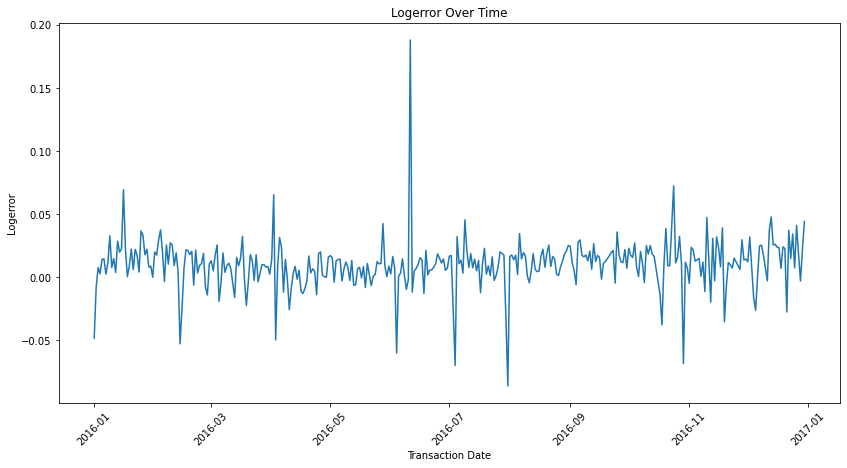

In [7]:
# Ensure the date column is in datetime format
df_train['transactiondate'] = pd.to_datetime(df_train['transactiondate'])

# Aggregate logerror by date (e.g., taking the mean logerror per day)
df_aggregated = df_train.groupby('transactiondate')['logerror'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='transactiondate', y='logerror', data=df_aggregated)

# Set the title and labels
plt.title('Logerror Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Logerror')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

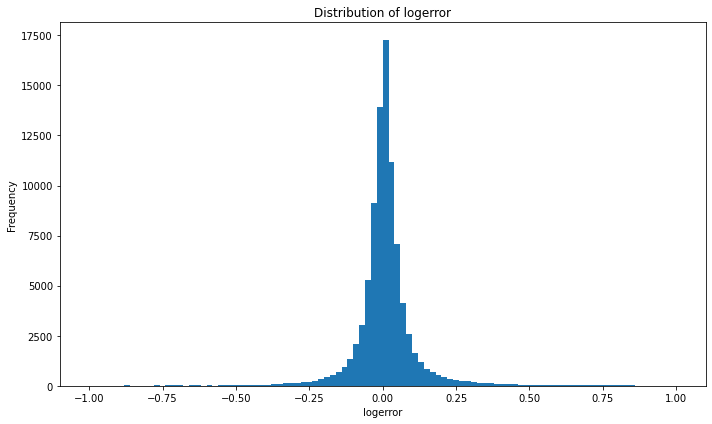

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(train_2016['logerror'], bins=100, range=(-1, 1))
plt.title('Distribution of logerror')
plt.xlabel('logerror')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:>

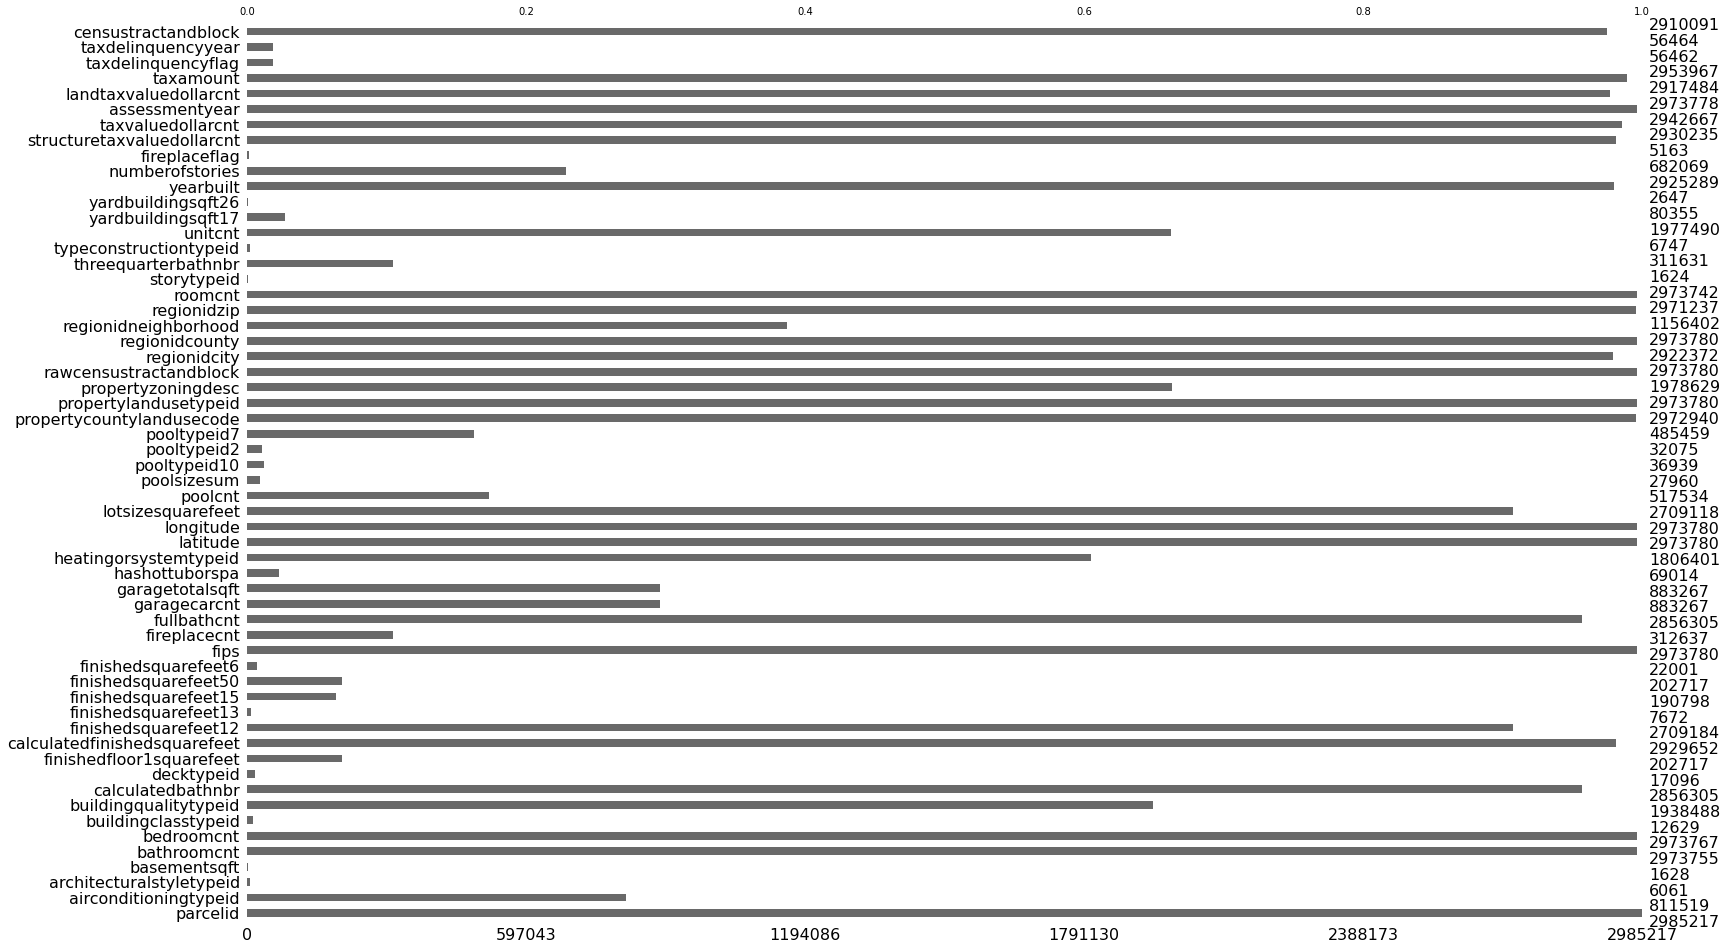

In [9]:
!pip3 install missingno
import missingno as msno
msno.bar(properties_2016)